## Particle Mover GANs & Adaptible Hybrid Noise Generators

Author: [Kai Londenberg](Kai.Londenberg@googlemail.com) - 2018

The recent success story of WGAN models for learning deep generative models is based on a certain formulation of adversarial training which can be interpreted as the minimization of the Wasserstein Distance $ W $ , also known as Earth-Mover Distance between a parametric generated distribution $ P_{\theta} $ and a fixed empirical distribution $ P_r $.

$ P_{\theta} $ in the context of recent generative models such as GAN and VAE variants is usually generated by sampling a continuous random vector $ Z $ from a known probability distribution, and transforming the generated samples using a trainable  neural network function $ g_\theta $ so that $ P_\theta = g_\theta(Z) $ 

The learning objective in this context is to **learn a distribution** via minimization of some kind of distance or divergence between $ P_r $ and $ P_\theta $. We will call this distance function $ d(P_r, P_\theta) $

[Martin Arjovsky, Soumith Chintala and Léon Bottou showed](https://arxiv.org/abs/1701.07875) that the choice of this distance function, with the most common choice being the KL-Divergence, is of paramount importance for the ability of a gradient-based optimization method to succeed in letting $ P_\theta $ converge towards $ P_r $ as the training optimizes the objective $ \min_{\theta} d(P_r, P_\theta) $

In this context, they proved that the minimization of the so-called Wasserstein Distance $ W $, also known as Earth-Mover Distance is ideal, for reasons detailed below.  

To introduce the Wasserstein Distance, we define $ \prod(P_\theta,P_r) $ as the set of all joint distributions $ \lambda $ whose marginal distributions are $ P_\theta $ and $ P_r $ respectively. Then the Earth-Mover or Wasserstein Distance is defined as

$$
W(P_\theta, P_r) = \inf_{\lambda \in \prod(P_\theta,P_r)} \mathbb{E}_{(x,y) \sim \lambda}[\parallel x-y \parallel]
$$

This has been described as a measure of how much probability mass would need to be moved at minimum to convert one distribution to the other. Therefore the name Earth-Mover distance. See [Wasserstein GAN Read Through](https://www.alexirpan.com/2017/02/22/wasserstein-gan.html) for a good explanation.

The Wasserstein Distance is very important, given that the paper also provided proofs that under some mild conditions:

 * If $ P_\theta $ is a smooth function of $ \theta $, then $ W(P_\theta, P_r) $ is also smooth over $ \theta $.
 * The above is not generally true for KL-Divergence and other Divergences or distribution distance metrics.
 * $ W(P_\theta, P_r) \rightarrow 0 $ implies convergence in probability of $ P_\theta$ and $ P_r $ 
 *  Consequently, $ W(P_\theta, P_r) \rightarrow 0 $ implies $ KL(P_\theta, P_r) \rightarrow 0 $ and $ {KL}(P_r, P_\theta) \rightarrow 0 $.
 

In general, the Wasserstein distance cannot be calculated exactly. So we need to approximate it, and the WGAN paper describes a way of how to achieve this with great experimental results by exploiting the so called [Kantorovich-Rubinstein duality](https://en.wikipedia.org/wiki/Wasserstein_metric#Dual_representation_of_W1) of the Wasserstein Metric.

This can be achieved by a slight alteration of GAN training. The subsequent training algorithm, called a WGAN has been experimentally evaluated (and further refined in subsequent papers) to great success,

The planned contribution of this paper is to develop an alternative and maybe more easily applicable method to achieve the same goal, without the necessity (but with possibility) of adversarial training, with potential applicability to mixed discrete and continuous distributions (so Z may be completely or partially discrete and might even have an intractable density), and with the potential to solve the mode collapse problem of GAN training.

The idea for the matching paired samples has been strongly influenced by the Paper [Wang Q Kulkarni S Verdú S: A Nearest-Neighbor Approach to Estimating Divergence between Continuous Random Vectors](https://www.princeton.edu/~verdu/nearest.neigh.pdf) which uses a similar approach to estimate divergences. 

### Nonparametric Density Estimate over a Latent Manifold

The following is an variant of the approach of [D. O. Loftsgaarden, C. P. Quesenberry: A nonparametric estimate of a multivariate density function](https://projecteuclid.org/euclid.aoms/1177700079).

Let $P_x$ be a random variable with range $ \mathbb{R}^q $ and $ \{ x_i\}_{i=1}^{n} $ be a list of i.i.d, samples with $ x_i \sim P_x $. Furthermore, let $ d: (\mathbb{R}^q,\mathbb{R}^q)  \mapsto [ 0, \infty ) $  be a smooth and differentiable function, which we will call the natural sample distance metric and assume to be given or learnable. 

We assume the random variable $P_x$ to be functionally related to this natural distance metric.

This functional relation can be specified as follows. We assume that the natural distance metric internally maps two points on space $ \mathbb{R}^q $ to a latent manifold $ \mathbb{A} $ and and then computes their distance on that space. Therefore, we introduce mapping $ m : \mathbb{R}^q \mapsto \mathbb{A} $ and latent distance metric $ d_A : \mathbb{A}x\mathbb{A} \mapsto [ 0, \infty ) $ and define $ d(x_i,x_j) = d_A(m(x_i), m(x_j)) $. We also define the inverse mapping $ s : \mathbb{A} \mapsto \mathbb{R}^q $ with $ m := s^{-1} $.

We further assume existence of Lebesgue measure $ \mu(A) $ over $ A \subseteq \mathbb{A} $ which is determined by $ d_A $. We further define $ \mu_P(A) = \frac{\mu(A)}{Z} $ to be a normalized probability measure based on $ \mu $, e.g. we define $ Z = \mu(\mathbb{A}) $. Note that $ Z $ is considered to be unknown. 

The triplet $ (\mathbb{A}, \mathbb{B}_A, \mu_P ) $ forms a probability space under Lebesgue measure with $ \mathbb{B}_A $ being the Borel-Sets of $ \mathbb{A} $. We will call this our latent probability space. The random variable $ P_x $ is then defined as a Borel-Measurable, vector-valued function over this probability space with $ P_x(X) = \mu_P(s(X)) ; X \subseteq \mathbb{R}^q $

Being a manifold, $ \mathbb{A} $ can be considered [locally w-euclidean](https://topospaces.subwiki.org/wiki/Locally_Euclidean_space) with  unknown but finite dimensionality $ w  $. As such, we assume that within the $ \epsilon $ neighbourhood of any point $ a_i \in \mathbb{A} $, the following property holds:

$
\forall r <= \epsilon: A = \{ a ; d_A(a,a_i)<r \} \Rightarrow \mu(A) \approxeq V_w(r)
$

where V_w(r) is the radius of a hypersphere in $ \mathbb{R}^w $. Also note that $ A \in \mathbb{B}_A$. 

That is, we assume the measure $ \mu(A) $ to be locally approximated by the volume of a w-dimensional hypersphere around point $ a_i $ with a radius defined over the metric $ d_A $ as long as we stay within an $\epsilon$-neighbourhood. The intuition being, that probability measures can be considered to be generalizations of the concepts of length, area or volume in euclidean spaces.

By extension, we have for every point within the $ \epsilon $ neighbourhood of $ x_i \in \mathbb{R}^q $

$
\forall r <= \epsilon: X = \{ x ; d(x,x_i)<r \} \Rightarrow \mu(m(X)) \approxeq V_w(r)
$

If we define the set $ H(x,r) := \{x : x \in \mathbb{R}^q \land d(x_i,x)<r \} $ and set $ P_x(X \subseteq \mathbb{R}^q ) := \mu_A(m(X \subseteq \mathbb{R}^q )) $, we arrive at

$$
P_x(H(x_i,d(x_i,x_j)) \approxeq \frac{V_w(r)}{Z}
$$

We can furthermore define the density of $P_x$ as $ p_x(x) = \lim_{x_j \rightarrow x_i} P_x(H(x_i,d(x_i, x_j)) = \lim_{r \rightarrow 0} P_x(H(x_i,r)) $. 

If we sample $ \{ x_1, ..., x_n \} $ i.i.d with all $ x_i \sim P_x $ the expected number of samples with $ d(x, x_i) \lt r \leq\epsilon $ around an arbitrary point x can be calculated as

$$
E[\vert\{ x_i : d(x, x_i)<=r\}\vert] \approxeq P_x(H(x,r)) \cdot n = \frac{E_{( \hat{x} \sim P_x \,\land\, \hat{x}\in H(x,r) )}[p_x(\hat{x})] \cdot V(r) \cdot n}{Z}
$$

Which gives us a way to estimate the density around a point x given an empirical list of samples for a given radius r:

$$
\hat{p}_x(x,r) = \frac{\vert\{ x_i : d(x, x_i)<=r\}\vert \cdot Z }{V(r) \cdot n}
$$

Assuming we can also calculate a running Monte-Carlo estimate of Z, we can derive our density estimate based on a potentially learned metric function $d$ and dimensionality $w$. 

*Note*: A hypersphere in a $ w $ dimensional space with radius $ r $ has the volume

$$
V_w(r) = \frac{r^w \pi^{{\frac{w}{2}}}}{\Gamma(\frac{w}{2}+1)}
$$

where $ \Gamma $ is the gamma function. 

### Mini-Batch Wasserstein Distance Estimator

We will now construct a Mini-Batch estimator for the Wasserstein distance. We will recall the definition:

Define $ \prod(P_x,P_y) $ as the set of all joint distributions $ \lambda $ whose marginal distributions are $ P_x $ and $ P_y $ respectively. Then the Earth-Mover or Wasserstein Distance is defined as

$$
W(P_x, P_y) = \inf_{\lambda \in \prod(P_x,P_y)} E_{(x,y) \sim \lambda}[d(x,y)]
$$

We will therefore introduce a second distribution $ P_y $ which we can also sample from $ \{ y_i, ..., y_n \} $ with $ y_i \in \mathbb{R}^q \sim P_y $ defined over the same. 

in our case, we have finite lists of samples with point density estimates available for both distributions at each of the samples. We can precompute all of these pointwise densities and the matrix of pairwise distances between samples. After proper normalization of the pointwise densities, we can then treat the densities as discrete probability mass and [compute the exact discrete solution of the Earth Mover Distance](https://en.wikipedia.org/wiki/Earth_mover%27s_distance#Computing_the_EMD). 

This requires solving the so called Transportation Problem and can be done in polynomial time. In Python, there is at least one implementation available as part of the MIT Licensed [Python Optimal Transport Library by Rémi Flamary and Nicolas Courty](https://github.com/rflamary/POT) 




### Approach for Adaptible Hybrid Noise Generator

Interestingly, for a given a solution of the transport problem, there are two ways to increase or decrease the density of a sample at a given point. One variant is to pull samples to, or push them away from a given point. Another variant is to directly increase or decrease the probability mass of samples at a given point. Both might lead to augmenting learning strategies.

Pulling or pushing samples can be achieved by exploiting the gradient with respect to the distance metric. Decreasing or Increasing the overall probability of a given sample might be achieved by directly modifying the probability mass of the noise underlying a generated sample.

Most importantly in this context, if we assume the natural distance metric to work on some kind of latent manifold, we cannot trust the direction of gradient updates over long ranges, as it could even pull us towards regions of low or even into regions of zero density. 


In [8]:
import torch
import torch.nn as nn
from torch.autograd import no_grad, Variable
from torch.nn.utils.clip_grad import clip_grad_norm
import numpy as np
import matplotlib.pylab as plt
import ot # Python Optimal Transport Library
import scipy.stats as scistats

In [35]:
class MyMix(object):
    
    def __init__(self, weights, dists):
        self.weights = weights
        self.dists = dists
        
    def rvs(self, n):
        distchoice = np.nonzero(np.random.multinomial(1, self.weights, n))[1]
        values = [ self.dists[i].rvs(1)[0] for i in distchoice]
        return np.array(values)


In [76]:
P_r = MyMix([0.3, 0.1, 0.45, 0.15], [scistats.beta(1,100), scistats.beta(200,1), scistats.halfnorm(0.6, 0.05)])

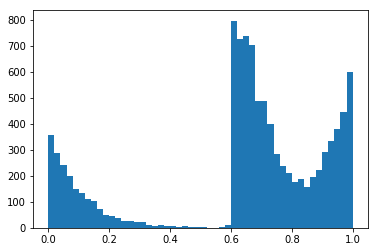

In [77]:
plt.hist(P_x.rvs(10000), bins=50)
plt.show()

In [157]:
class SimpleParametricSampler(nn.Module):
    
    def __init__(self, in_dim, out_dim):
        super(SimpleParametricSampler, self).__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.network = nn.Sequential(
            nn.Linear(in_dim, 50),
            nn.Dropout(0.2), # Dropout injects discrete noise
            nn.LeakyReLU(),
            nn.Linear(50, 50),
            nn.Dropout(0.2), # Dropout injects discrete noise
            nn.LeakyReLU(),
            nn.Linear(50, 50),
            nn.Dropout(0.2), # Dropout injects discrete noise
            nn.Softplus(),
            nn.Linear(50, out_dim)
        )
        
    def forward(self, batchsize):
        # Start with mul
        noise = Variable(torch.randn((batchsize, self.in_dim)), requires_grad=False)
        return self.network(noise) 
    


In [162]:
model = SimpleParametricSampler(10, 2)

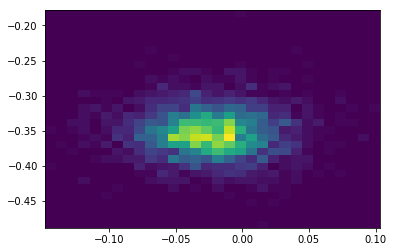

In [188]:
# Parametric Model - initial state
rnd = model.forward(3000).detach().numpy()
plt.hist2d(rnd[:, 0], rnd[:, 1], bins=30)
plt.show()

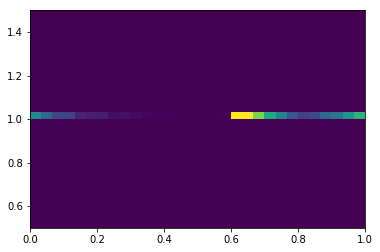

In [192]:
# Multimodal Mixture Model with very limited support in second dimension
plt.hist2d(P_x.rvs(2000), np.ones(2000), bins=30)
plt.show()

In [ ]:
class WassersteinDistanceLoss(nn.Module):
    
    def __init__(self, distance, nbatch, nsamples):
        self.distance = distance
        self.nsamples = nsamples
        self.nbatch = nbatch
        self.register_buffer('distance_matrix_xx', torch.tensor((nsamples,nsamples,nbatch)), requires_grad=False)
        self.register_buffer('distance_matrix_xy', torch.tensor((nsamples,nsamples,nbatch)), requires_grad=False)
        self.register_buffer('distance_matrix_yy', torch.tensor((nsamples,nsamples,nbatch)), requires_grad=False)
        self.register_buffer('distance_matrix_yx', torch.tensor((nsamples,nsamples,nbatch)), requires_grad=False)
        
        self.register_buffer('nearest_neighbour_xx', torch.IntTensor((nbatch,nsamples)))
        self.register_buffer('nearest_neighbour_yy', torch.IntTensor((nbatch,nsamples)))
        self.register_buffer('nearest_neighbour_yy', torch.IntTensor((nbatch,nsamples)))
        self.register_buffer('nearest_neighbour_yx', torch.IntTensor((nbatch,nsamples)))
        
    def precompute_distances(self, samples_a, samples_b, target, maxout_same):
        for a in range(self.nsamples):
            for b in range(self.nsamples):
                batch_a_ = samples_a[a]
                batch_b = samples_b[b]
                batch_distances = self.distance(batch_a, batch_b)
                target[a,b,:].set_(batch_distances.data)
    
    
    
        
        
    def forward(self, sx, sy):
        """
        Precompute Nearest Neighbours, Densities and Distance Matrices for two sample lists 
        :param samples_x: Sample list of distribution P_x. Dimensions should be interpreted as N-Samples x N-Batch x[...]
        :param samples_y: Sample list of distribution P_y. Dimensions should be interpreted as N-Samples x N-Batch x[...]
        :returns averaged Wasserstein Distance Estimate
        """
        assert(sx.size()[0]==sy.size()[0]==self.nsamples)
        assert(sx.size()[1]==sy.size()[1]==self.nbatch)
        self.precompute_distances(sx, sx, self.distance_matrix_xx)
        self.precompute_distances(sx, sy, self.distance_matrix_xy)
        self.precompute_distances(sy, sy, self.distance_matrix_yy)
        self.precompute_distances(sy, sx, self.distance_matrix_yx)
        
        
        
        

##### Paired Distance Estimator

If $ P_x = P_y $ we would assume that $ E_{x,y \sim (P_x, P_y)}[\hat{p}_{xy}-\hat{p}_{xx}] = 0 $



### Pairing Distance Estimator



In order to estimate the probability density of $ P_x $ and $ P_y $ based on these samples respectively, we will proceed as follows.

###### Precompute all pairwise distances between samples
 
$$ d^{xx}_{ij} = d(x_i, x_j) $$
$$ d^{yy}_{ij} = d(x_i, x_j) $$
$$ d^{xy}_{ij} = d^{yx}_{ji} = d(x_i, y_j) $$

###### Solve the stable marriage problem

Next, we build best matching pairs by solving a [Stable Marriage Problem](https://en.wikipedia.org/wiki/Stable_marriage_problem), finding the best unmatched partner for each sample both from the own list of samples and the other list of samples, where each sample can only be married to one partner from the own distribution and to one partner of the other distribution, with preference being determined by distance (preferring lower distance), breaking preference ties at random.

We arrive at two lists of matched sample pairs. 

We assume that given $ \theta $ we can easily sample from $ P_\theta $, but we do not assume that we can calculate a density for it. So $ P_\theta $ might contain arbitrary sources of discrete and continuous randomness such as Dropout-Layers in training mode (as in [Yarin Gal: Dropout as a Bayesian Approximation](https://arxiv.org/pdf/1506.02142.pdf) ) as well as continous random variables, as long as we have a training procedure and we can easily generate i.i.d samples.

This means we could also plug in and combine alternative probabilistic graphical models (PGMs) such as CRFs, RBMs, Deep Belief Nets, Bayesian Networks, HMMs, Dynamic Bayesian Networks and their hybrids. 

In [2]:
%matplotlib inline


## References

 * [Wang Q Kulkarni S Verdú S: A Nearest-Neighbor Approach to Estimating Divergence between Continuous Random Vectors](https://www.princeton.edu/~verdu/nearest.neigh.pdf)
 * [D. O. Loftsgaarden, C. P. Quesenberry: A nonparametric estimate of a multivariate density function](https://projecteuclid.org/euclid.aoms/1177700079)
 * [Martin Arjovsky, Soumith Chintala, Léon Bottou: Wasserstein GAN](https://arxiv.org/abs/1701.07875)
 * [Wasserstein GAN Read Through](https://www.alexirpan.com/2017/02/22/wasserstein-gan.html)
 